# Credit Risk Classification - Complete ML Pipeline
**ML Assignment 2 - Binary Classification**

- **Dataset**: Credit Risk Customers (German Credit Data)
- **Features**: 20 customer features
- **Target**: Binary (good/bad credit risk)
- **Models**: 6 ML algorithms

## Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, matthews_corrcoef
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import pickle
import os

print("="*70)
print("  CREDIT RISK CLASSIFICATION - ML ASSIGNMENT 2")
print("="*70)
print("\nLibraries imported successfully!")

  CREDIT RISK CLASSIFICATION - ML ASSIGNMENT 2

Libraries imported successfully!


## Step 2: Load Dataset

In [2]:
print("\n" + "="*70)
print("LOADING DATASET")
print("="*70)

# Load the dataset
try:
    dataset_path = r'C:\Users\Lenovo\Documents\Visual Studio Code\CreditRisk_ML\data\credit_customers.csv'

    if not os.path.exists(dataset_path):
        print(f"❌ Dataset file not found at: {dataset_path}")
        raise FileNotFoundError("Dataset not found")

    df = pd.read_csv(dataset_path)
    print(f"✓ Dataset loaded from: {dataset_path}")

except Exception as e:
    print(f"Error loading dataset: {e}")
    raise

print(f"\nDataset Shape: {df.shape}")
print(f"Total Features: {df.shape[1]}")
print(f"Total Records: {df.shape[0]}")


LOADING DATASET
✓ Dataset loaded from: C:\Users\Lenovo\Documents\Visual Studio Code\CreditRisk_ML\data\credit_customers.csv

Dataset Shape: (1000, 21)
Total Features: 21
Total Records: 1000


## Step 3: Initial Data Exploration

In [3]:
print("\n" + "="*70)
print("DATA EXPLORATION")
print("="*70)

print("\nFirst 5 rows:")
display(df.head())

print("\nColumn Names:")
print(list(df.columns))

print("\nData Types:")
display(df.dtypes)

print("\nMissing Values:")
display(df.isnull().sum())

print("\nBasic Statistics:")
display(df.describe())


DATA EXPLORATION

First 5 rows:


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad



Column Names:
['checking_status', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings_status', 'employment', 'installment_commitment', 'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'age', 'other_payment_plans', 'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker', 'class']

Data Types:


checking_status            object
duration                  float64
credit_history             object
purpose                    object
credit_amount             float64
savings_status             object
employment                 object
installment_commitment    float64
personal_status            object
other_parties              object
residence_since           float64
property_magnitude         object
age                       float64
other_payment_plans        object
housing                    object
existing_credits          float64
job                        object
num_dependents            float64
own_telephone              object
foreign_worker             object
class                      object
dtype: object


Missing Values:


checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64


Basic Statistics:


,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


## Step 4: Data Preprocessing

In [4]:
print("\n" + "="*70)
print("DATA PREPROCESSING")
print("="*70)

# Target variable
target_col = 'class'

# Make a copy
df_clean = df.copy()

# 1. Handle missing values
print("\n1. Handling missing values...")
df_clean = df_clean.dropna()
print(f"   Rows after cleaning: {len(df_clean)}")

# 2. Encode categorical variables
print("\n2. Encoding categorical variables...")
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove(target_col)  # Remove target from features

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col].astype(str))
    label_encoders[col] = le
    print(f"   ✓ Encoded: {col}")

# 3. Encode target variable
print(f"\n3. Encoding target variable '{target_col}'...")
target_encoder = LabelEncoder()
df_clean[target_col] = target_encoder.fit_transform(df_clean[target_col])
print(f"   Mapping: {dict(zip(target_encoder.classes_, target_encoder.transform(target_encoder.classes_)))}")

print(f"\nTarget distribution:")
display(df_clean[target_col].value_counts())

# Display sample of preprocessed data
print("\nFirst 5 rows after preprocessing:")
display(df_clean.head())


DATA PREPROCESSING

1. Handling missing values...
   Rows after cleaning: 1000

2. Encoding categorical variables...
   ✓ Encoded: checking_status
   ✓ Encoded: credit_history
   ✓ Encoded: purpose
   ✓ Encoded: savings_status
   ✓ Encoded: employment
   ✓ Encoded: personal_status
   ✓ Encoded: other_parties
   ✓ Encoded: property_magnitude
   ✓ Encoded: other_payment_plans
   ✓ Encoded: housing
   ✓ Encoded: job
   ✓ Encoded: own_telephone
   ✓ Encoded: foreign_worker

3. Encoding target variable 'class'...
   Mapping: {'bad': np.int64(0), 'good': np.int64(1)}

Target distribution:


class
1    700
0    300
Name: count, dtype: int64


First 5 rows after preprocessing:


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6.0,1,6,1169.0,4,3,4.0,3,2,...,3,67.0,1,1,2.0,1,1.0,1,1,1
1,0,48.0,3,6,5951.0,2,0,2.0,0,2,...,3,22.0,1,1,1.0,1,1.0,0,1,0
2,3,12.0,1,2,2096.0,2,1,2.0,3,2,...,3,49.0,1,1,1.0,3,2.0,0,1,1
3,1,42.0,3,3,7882.0,2,1,2.0,3,1,...,1,45.0,1,0,1.0,1,2.0,0,1,1
4,1,24.0,2,4,4870.0,2,0,3.0,3,2,...,2,53.0,1,0,2.0,1,2.0,0,1,0


## Step 5: Separate Features and Target

In [5]:
print("\n" + "="*70)
print("DATA PREPROCESSING")
print("="*70)

# Make a copy
df_clean = df.copy()

# 1. Handle missing values
print("\n1. Handling missing values...")
missing_before = df_clean.isnull().sum().sum()
df_clean = df_clean.dropna()
missing_after = df_clean.isnull().sum().sum()
print(f"   Missing values before: {missing_before}")
print(f"   Missing values after: {missing_after}")
print(f"   Rows after cleaning: {len(df_clean)}")

# 2. Encode categorical variables
print("\n2. Encoding categorical variables...")
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()

# Remove target from categorical if it's there
if target_col in categorical_cols:
    categorical_cols.remove(target_col)

print(f"   Categorical columns found: {len(categorical_cols)} columns")

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col].astype(str))
    label_encoders[col] = le
    print(f"   ✓ Encoded: {col}")

# 3. Encode target variable if it's categorical
if df_clean[target_col].dtype == 'object':
    print(f"\n3. Encoding target variable '{target_col}'...")
    target_encoder = LabelEncoder()
    df_clean[target_col] = target_encoder.fit_transform(df_clean[target_col])
    print(f"   Original values: {target_encoder.classes_}")
    print(f"   Encoded as: {list(range(len(target_encoder.classes_)))}")
    print(f"   Mapping: bad=0, good=1" if 'bad' in target_encoder.classes_ else "   Check mapping above")
else:
    print(f"\n3. Target variable '{target_col}' is already numerical")
    target_encoder = None

# 4. Ensure binary classification
print("\n4. Verifying binary classification...")
n_classes = df_clean[target_col].nunique()
print(f"   Number of classes: {n_classes}")

if n_classes > 2:
    print(f"   ⚠ Converting to binary (0 vs rest)")
    df_clean[target_col] = (df_clean[target_col] > 0).astype(int)

print(f"\nFinal target distribution:")
print(df_clean[target_col].value_counts())
print(f"Percentage:")
print(df_clean[target_col].value_counts(normalize=True) * 100)

# Display sample of preprocessed data
print("\n" + "="*70)
print("SAMPLE OF PREPROCESSED DATA")
print("="*70)
print("\nFirst 5 rows after feature engineering:")
display(df_clean.head())

print("\nData types after preprocessing:")
display(df_clean.dtypes)


DATA PREPROCESSING

1. Handling missing values...
   Missing values before: 0
   Missing values after: 0
   Rows after cleaning: 1000

2. Encoding categorical variables...
   Categorical columns found: 13 columns
   ✓ Encoded: checking_status
   ✓ Encoded: credit_history
   ✓ Encoded: purpose
   ✓ Encoded: savings_status
   ✓ Encoded: employment
   ✓ Encoded: personal_status
   ✓ Encoded: other_parties
   ✓ Encoded: property_magnitude
   ✓ Encoded: other_payment_plans
   ✓ Encoded: housing
   ✓ Encoded: job
   ✓ Encoded: own_telephone
   ✓ Encoded: foreign_worker

3. Encoding target variable 'class'...
   Original values: ['bad' 'good']
   Encoded as: [0, 1]
   Mapping: bad=0, good=1

4. Verifying binary classification...
   Number of classes: 2

Final target distribution:
class
1    700
0    300
Name: count, dtype: int64
Percentage:
class
1    70.0
0    30.0
Name: proportion, dtype: float64

SAMPLE OF PREPROCESSED DATA

First 5 rows after feature engineering:


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6.0,1,6,1169.0,4,3,4.0,3,2,...,3,67.0,1,1,2.0,1,1.0,1,1,1
1,0,48.0,3,6,5951.0,2,0,2.0,0,2,...,3,22.0,1,1,1.0,1,1.0,0,1,0
2,3,12.0,1,2,2096.0,2,1,2.0,3,2,...,3,49.0,1,1,1.0,3,2.0,0,1,1
3,1,42.0,3,3,7882.0,2,1,2.0,3,1,...,1,45.0,1,0,1.0,1,2.0,0,1,1
4,1,24.0,2,4,4870.0,2,0,3.0,3,2,...,2,53.0,1,0,2.0,1,2.0,0,1,0



Data types after preprocessing:


checking_status             int64
duration                  float64
credit_history              int64
purpose                     int64
credit_amount             float64
savings_status              int64
employment                  int64
installment_commitment    float64
personal_status             int64
other_parties               int64
residence_since           float64
property_magnitude          int64
age                       float64
other_payment_plans         int64
housing                     int64
existing_credits          float64
job                         int64
num_dependents            float64
own_telephone               int64
foreign_worker              int64
class                       int64
dtype: object

## Step 6: Correlation Matrix & Feature Analysis

In [6]:
print("\n" + "="*70)
print("SEPARATING FEATURES AND TARGET")
print("="*70)

X = df_clean.drop(target_col, axis=1)
y = df_clean[target_col]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Feature names: {list(X.columns)}")


SEPARATING FEATURES AND TARGET
Features shape: (1000, 20)
Target shape: (1000,)
Feature names: ['checking_status', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings_status', 'employment', 'installment_commitment', 'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'age', 'other_payment_plans', 'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker']



CORRELATION MATRIX & FEATURE ANALYSIS

Correlation Matrix Shape: (20, 20)

--- High Correlation Pairs (|correlation| > 0.7) ---
  No highly correlated feature pairs found (threshold: 0.7)

--- Feature Correlation with Target ---

Top 10 positively correlated features:


checking_status        0.302406
purpose                0.138152
savings_status         0.103133
age                    0.091127
personal_status        0.089535
property_magnitude     0.055529
other_payment_plans    0.053862
existing_credits       0.045732
own_telephone          0.036466
job                    0.032756
Name: target, dtype: float64


Top 10 negatively correlated features:


other_parties             0.028441
num_dependents            0.003015
residence_since          -0.002967
employment               -0.008932
housing                  -0.019315
installment_commitment   -0.072404
foreign_worker           -0.082079
credit_history           -0.097054
credit_amount            -0.154739
duration                 -0.214927
Name: target, dtype: float64


Generating correlation heatmap (including target)...
✓ Correlation matrix saved as 'correlation_matrix.png'


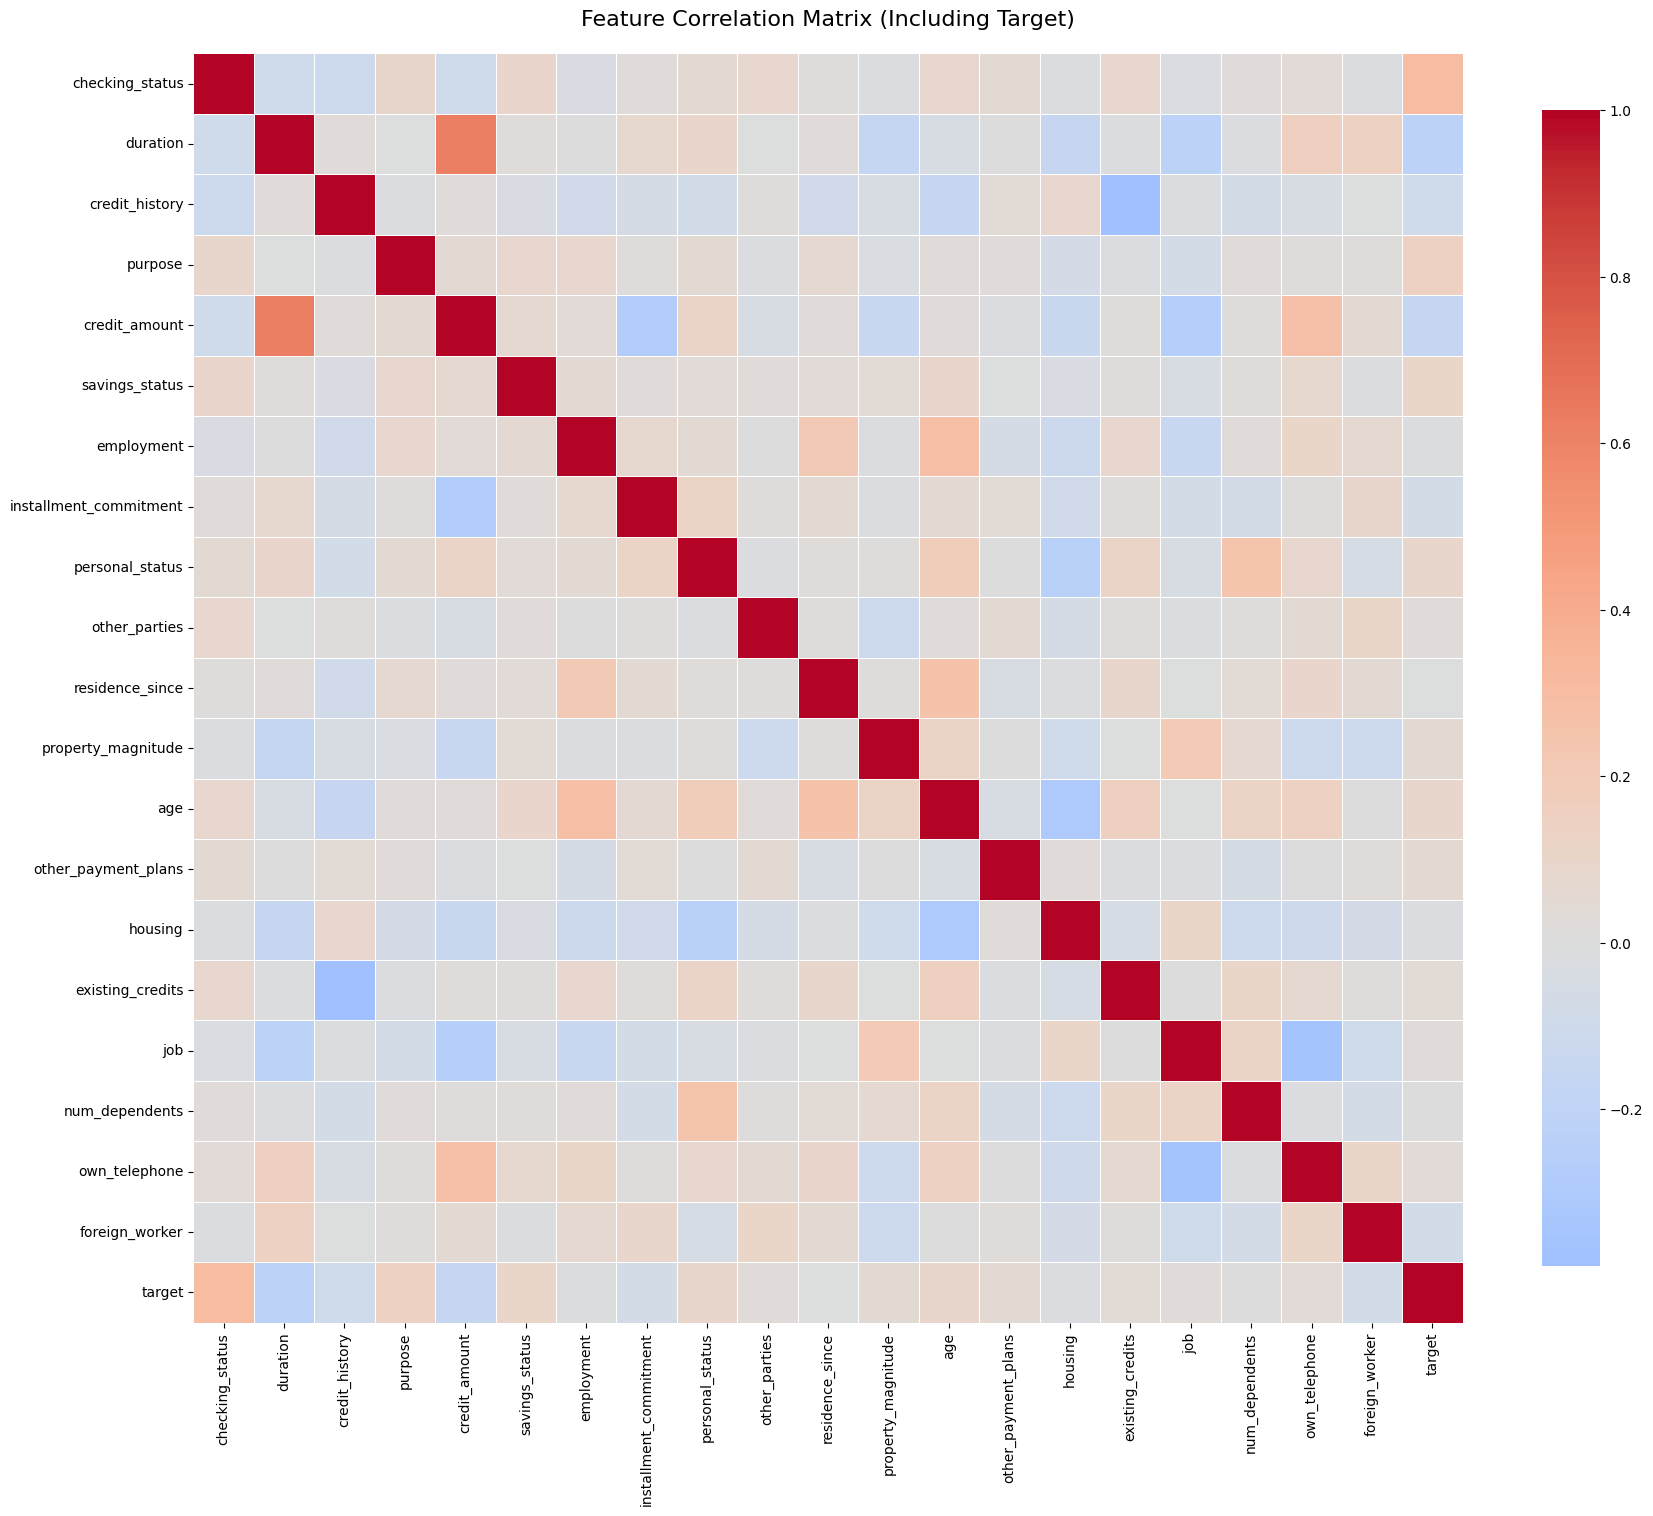


--- FEATURE SELECTION BASED ON TARGET CORRELATION ---

Features with strong correlation to target (|r| > 0.2): 2 features


checking_status    0.302406
duration          -0.214927
Name: target, dtype: float64


⚠ Features with weak correlation to target (|r| < 0.05): 8 features
These features might be candidates for removal:


existing_credits    0.045732
own_telephone       0.036466
job                 0.032756
other_parties       0.028441
num_dependents      0.003015
residence_since    -0.002967
employment         -0.008932
housing            -0.019315
Name: target, dtype: float64


--- Feature Variance Analysis ---

Top 10 features by variance:


credit_amount             7.967843e+06
duration                  1.454150e+02
age                       1.294013e+02
purpose                   5.861606e+00
personal_status           1.824941e+00
employment                1.807182e+00
checking_status           1.570847e+00
property_magnitude        1.466470e+00
installment_commitment    1.251523e+00
savings_status            1.235210e+00
dtype: float64


Bottom 10 features by variance:


residence_since        1.218193
credit_history         1.132171
job                    0.895820
existing_credits       0.333685
housing                0.282241
own_telephone          0.241025
other_parties          0.198242
other_payment_plans    0.177714
num_dependents         0.131106
foreign_worker         0.035667
dtype: float64

In [7]:
print("\n" + "="*70)
print("CORRELATION MATRIX & FEATURE ANALYSIS")
print("="*70)

# Create correlation matrix
correlation_matrix = X.corr()

print("\nCorrelation Matrix Shape:", correlation_matrix.shape)

# Find features highly correlated with each other
print("\n--- High Correlation Pairs (|correlation| > 0.7) ---")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

if high_corr_pairs:
    for feat1, feat2, corr_val in high_corr_pairs:
        print(f"  {feat1} <-> {feat2}: {corr_val:.3f}")
else:
    print("  No highly correlated feature pairs found (threshold: 0.7)")

# Correlation with target
print("\n--- Feature Correlation with Target ---")
# Create a dataframe with features and target for correlation
df_with_target = X.copy()
df_with_target['target'] = y

target_correlation = df_with_target.corr()['target'].drop('target').sort_values(ascending=False)
print("\nTop 10 positively correlated features:")
display(target_correlation.head(10))
print("\nTop 10 negatively correlated features:")
display(target_correlation.tail(10))

# Visualize correlation matrix INCLUDING TARGET
print("\nGenerating correlation heatmap (including target)...")
plt.figure(figsize=(18, 16))
# Use df_with_target which includes the target column
correlation_with_target = df_with_target.corr()
sns.heatmap(correlation_with_target, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix (Including Target)', fontsize=16, pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=100, bbox_inches='tight')
print("✓ Correlation matrix saved as 'correlation_matrix.png'")
plt.show()

# Feature selection based on correlation with target
print("\n--- FEATURE SELECTION BASED ON TARGET CORRELATION ---")
# Features with strong correlation (|r| > 0.2) with target
strong_features = target_correlation[abs(target_correlation) > 0.2]
print(f"\nFeatures with strong correlation to target (|r| > 0.2): {len(strong_features)} features")
display(strong_features.sort_values(ascending=False))

# Features with weak correlation (|r| < 0.05) - potential candidates for removal
weak_features = target_correlation[abs(target_correlation) < 0.05]
if len(weak_features) > 0:
    print(f"\n⚠ Features with weak correlation to target (|r| < 0.05): {len(weak_features)} features")
    print("These features might be candidates for removal:")
    display(weak_features)

# Feature importance based on variance
print("\n--- Feature Variance Analysis ---")
feature_variance = X.var().sort_values(ascending=False)
print("\nTop 10 features by variance:")
display(feature_variance.head(10))
print("\nBottom 10 features by variance:")
display(feature_variance.tail(10))

## Step 7: Train-Test Split (80-20)

In [8]:
print("\n" + "="*70)
print("TRAIN-TEST SPLIT (80-20)")
print("="*70)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print("\nClass distribution in training set:")
print(y_train.value_counts())
print("\nClass distribution in testing set:")
print(y_test.value_counts())


TRAIN-TEST SPLIT (80-20)
Training set: 800 samples (80.0%)
Testing set: 200 samples (20.0%)

Class distribution in training set:
class
1    560
0    240
Name: count, dtype: int64

Class distribution in testing set:
class
1    140
0     60
Name: count, dtype: int64


## Step 8: Feature Scaling

In [9]:
print("\n" + "="*70)
print("FEATURE SCALING")
print("="*70)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set scaled: {X_train_scaled.shape}")
print(f"Testing set scaled: {X_test_scaled.shape}")
print("\n✓ Feature scaling completed using StandardScaler")


FEATURE SCALING
Training set scaled: (800, 20)
Testing set scaled: (200, 20)

✓ Feature scaling completed using StandardScaler


## Step 9: Model 1 - Logistic Regression

In [10]:
print("\n" + "="*70)
print("MODEL 1: LOGISTIC REGRESSION")
print("="*70)

lr_model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    class_weight='balanced'
)

lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred, zero_division=0)
lr_recall = recall_score(y_test, lr_pred, zero_division=0)
lr_f1 = f1_score(y_test, lr_pred, zero_division=0)
lr_auc = roc_auc_score(y_test, lr_pred_proba)
lr_mcc = matthews_corrcoef(y_test, lr_pred)

print(f"\nEVALUATION METRICS:")
print(f"  Accuracy:  {lr_accuracy:.4f}")
print(f"  AUC:       {lr_auc:.4f}")
print(f"  Precision: {lr_precision:.4f}")
print(f"  Recall:    {lr_recall:.4f}")
print(f"  F1 Score:  {lr_f1:.4f}")
print(f"  MCC:       {lr_mcc:.4f}")


MODEL 1: LOGISTIC REGRESSION

EVALUATION METRICS:
  Accuracy:  0.6800
  AUC:       0.7287
  Precision: 0.8455
  Recall:    0.6643
  F1 Score:  0.7440
  MCC:       0.3509


## Step 9: Model 1 - Logistic Regression

In [11]:
print("\n" + "="*70)
print("MODEL 1: LOGISTIC REGRESSION")
print("="*70)

lr_model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    class_weight='balanced'
)

lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred, zero_division=0)
lr_recall = recall_score(y_test, lr_pred, zero_division=0)
lr_f1 = f1_score(y_test, lr_pred, zero_division=0)
lr_auc = roc_auc_score(y_test, lr_pred_proba)
lr_mcc = matthews_corrcoef(y_test, lr_pred)

print(f"\nEVALUATION METRICS:")
print(f"  Accuracy:  {lr_accuracy:.4f}")
print(f"  AUC:       {lr_auc:.4f}")
print(f"  Precision: {lr_precision:.4f}")
print(f"  Recall:    {lr_recall:.4f}")
print(f"  F1 Score:  {lr_f1:.4f}")
print(f"  MCC:       {lr_mcc:.4f}")


MODEL 1: LOGISTIC REGRESSION

EVALUATION METRICS:
  Accuracy:  0.6800
  AUC:       0.7287
  Precision: 0.8455
  Recall:    0.6643
  F1 Score:  0.7440
  MCC:       0.3509


## Step 10: Model 2 - Decision Tree

In [12]:
print("\n" + "="*70)
print("MODEL 2: DECISION TREE")
print("="*70)

dt_model = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    class_weight='balanced'
)

dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)
dt_pred_proba = dt_model.predict_proba(X_test_scaled)[:, 1]

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred, zero_division=0)
dt_recall = recall_score(y_test, dt_pred, zero_division=0)
dt_f1 = f1_score(y_test, dt_pred, zero_division=0)
dt_auc = roc_auc_score(y_test, dt_pred_proba)
dt_mcc = matthews_corrcoef(y_test, dt_pred)

print(f"\nEVALUATION METRICS:")
print(f"  Accuracy:  {dt_accuracy:.4f}")
print(f"  AUC:       {dt_auc:.4f}")
print(f"  Precision: {dt_precision:.4f}")
print(f"  Recall:    {dt_recall:.4f}")
print(f"  F1 Score:  {dt_f1:.4f}")
print(f"  MCC:       {dt_mcc:.4f}")


MODEL 2: DECISION TREE

EVALUATION METRICS:
  Accuracy:  0.6050
  AUC:       0.6510
  Precision: 0.7798
  Recall:    0.6071
  F1 Score:  0.6827
  MCC:       0.1906


## Step 11: Model 3 - K-Nearest Neighbors

In [13]:
print("\n" + "="*70)
print("MODEL 3: K-NEAREST NEIGHBORS")
print("="*70)

knn_model = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance',
    metric='minkowski',
    p=2
)

knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
knn_pred_proba = knn_model.predict_proba(X_test_scaled)[:, 1]

knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred, zero_division=0)
knn_recall = recall_score(y_test, knn_pred, zero_division=0)
knn_f1 = f1_score(y_test, knn_pred, zero_division=0)
knn_auc = roc_auc_score(y_test, knn_pred_proba)
knn_mcc = matthews_corrcoef(y_test, knn_pred)

print(f"\nEVALUATION METRICS:")
print(f"  Accuracy:  {knn_accuracy:.4f}")
print(f"  AUC:       {knn_auc:.4f}")
print(f"  Precision: {knn_precision:.4f}")
print(f"  Recall:    {knn_recall:.4f}")
print(f"  F1 Score:  {knn_f1:.4f}")
print(f"  MCC:       {knn_mcc:.4f}")


MODEL 3: K-NEAREST NEIGHBORS

EVALUATION METRICS:
  Accuracy:  0.6850
  AUC:       0.6565
  Precision: 0.7421
  Recall:    0.8429
  F1 Score:  0.7893
  MCC:       0.1811


## Step 12: Model 4 - Gaussian Naive Bayes

In [14]:
print("\n" + "="*70)
print("MODEL 4: GAUSSIAN NAIVE BAYES")
print("="*70)

gnb_model = GaussianNB()
gnb_model.fit(X_train_scaled, y_train)
gnb_pred = gnb_model.predict(X_test_scaled)
gnb_pred_proba = gnb_model.predict_proba(X_test_scaled)[:, 1]

gnb_accuracy = accuracy_score(y_test, gnb_pred)
gnb_precision = precision_score(y_test, gnb_pred, zero_division=0)
gnb_recall = recall_score(y_test, gnb_pred, zero_division=0)
gnb_f1 = f1_score(y_test, gnb_pred, zero_division=0)
gnb_auc = roc_auc_score(y_test, gnb_pred_proba)
gnb_mcc = matthews_corrcoef(y_test, gnb_pred)

print(f"\nEVALUATION METRICS:")
print(f"  Accuracy:  {gnb_accuracy:.4f}")
print(f"  AUC:       {gnb_auc:.4f}")
print(f"  Precision: {gnb_precision:.4f}")
print(f"  Recall:    {gnb_recall:.4f}")
print(f"  F1 Score:  {gnb_f1:.4f}")
print(f"  MCC:       {gnb_mcc:.4f}")


MODEL 4: GAUSSIAN NAIVE BAYES

EVALUATION METRICS:
  Accuracy:  0.6800
  AUC:       0.7261
  Precision: 0.8016
  Recall:    0.7214
  F1 Score:  0.7594
  MCC:       0.2893


## Step 13: Model 5 - Random Forest (Ensemble)

In [15]:
print("\n" + "="*70)
print("MODEL 5: RANDOM FOREST (ENSEMBLE)")
print("="*70)

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, zero_division=0)
rf_recall = recall_score(y_test, rf_pred, zero_division=0)
rf_f1 = f1_score(y_test, rf_pred, zero_division=0)
rf_auc = roc_auc_score(y_test, rf_pred_proba)
rf_mcc = matthews_corrcoef(y_test, rf_pred)

print(f"\nEVALUATION METRICS:")
print(f"  Accuracy:  {rf_accuracy:.4f}")
print(f"  AUC:       {rf_auc:.4f}")
print(f"  Precision: {rf_precision:.4f}")
print(f"  Recall:    {rf_recall:.4f}")
print(f"  F1 Score:  {rf_f1:.4f}")
print(f"  MCC:       {rf_mcc:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))


MODEL 5: RANDOM FOREST (ENSEMBLE)

EVALUATION METRICS:
  Accuracy:  0.7200
  AUC:       0.7875
  Precision: 0.8333
  Recall:    0.7500
  F1 Score:  0.7895
  MCC:       0.3797

Top 10 Most Important Features:
                   Feature  Importance
0          checking_status    0.196264
4            credit_amount    0.119813
1                 duration    0.109285
3                  purpose    0.094064
12                     age    0.092574
5           savings_status    0.046923
2           credit_history    0.040275
11      property_magnitude    0.037562
7   installment_commitment    0.037052
6               employment    0.036253


## Step 14: Model 6 - XGBoost (Ensemble)

In [16]:
print("\n" + "="*70)
print("MODEL 6: XGBOOST (ENSEMBLE)")
print("="*70)

from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight('balanced', y_train)

xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

xgb_model.fit(X_train_scaled, y_train, sample_weight=sample_weights)
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_pred_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]

xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred, zero_division=0)
xgb_recall = recall_score(y_test, xgb_pred, zero_division=0)
xgb_f1 = f1_score(y_test, xgb_pred, zero_division=0)
xgb_auc = roc_auc_score(y_test, xgb_pred_proba)
xgb_mcc = matthews_corrcoef(y_test, xgb_pred)

print(f"\nEVALUATION METRICS:")
print(f"  Accuracy:  {xgb_accuracy:.4f}")
print(f"  AUC:       {xgb_auc:.4f}")
print(f"  Precision: {xgb_precision:.4f}")
print(f"  Recall:    {xgb_recall:.4f}")
print(f"  F1 Score:  {xgb_f1:.4f}")
print(f"  MCC:       {xgb_mcc:.4f}")


MODEL 6: XGBOOST (ENSEMBLE)

EVALUATION METRICS:
  Accuracy:  0.7100
  AUC:       0.7385
  Precision: 0.8015
  Recall:    0.7786
  F1 Score:  0.7899
  MCC:       0.3228


## Step 15: Model Comparison

In [17]:
print("\n" + "="*90)
print("COMPREHENSIVE MODEL COMPARISON")
print("="*90)

comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors',
              'Naive Bayes', 'Random Forest', 'XGBoost'],
    'Accuracy': [lr_accuracy, dt_accuracy, knn_accuracy, gnb_accuracy, rf_accuracy, xgb_accuracy],
    'AUC': [lr_auc, dt_auc, knn_auc, gnb_auc, rf_auc, xgb_auc],
    'Precision': [lr_precision, dt_precision, knn_precision, gnb_precision, rf_precision, xgb_precision],
    'Recall': [lr_recall, dt_recall, knn_recall, gnb_recall, rf_recall, xgb_recall],
    'F1': [lr_f1, dt_f1, knn_f1, gnb_f1, rf_f1, xgb_f1],
    'MCC': [lr_mcc, dt_mcc, knn_mcc, gnb_mcc, rf_mcc, xgb_mcc]
})

display(comparison_df)
print("="*90)

# Calculate rankings
comparison_df['Average'] = comparison_df[['Accuracy', 'AUC', 'Precision', 'Recall', 'F1', 'MCC']].mean(axis=1)
ranking = comparison_df.sort_values('Average', ascending=False).reset_index(drop=True)
ranking.insert(0, 'Rank', range(1, len(ranking) + 1))

print("\n" + "="*70)
print("OVERALL RANKING")
print("="*70)
display(ranking[['Rank', 'Model', 'Average']])


COMPREHENSIVE MODEL COMPARISON


,Model,Accuracy,AUC,Precision,Recall,F1,MCC
0,Logistic Regression,0.680,0.728690,0.845455,0.664286,0.744000,0.350908
1,Decision Tree,0.605,0.650952,0.779817,0.607143,0.682731,0.190623
2,K-Nearest Neighbors,0.685,0.656548,0.742138,0.842857,0.789298,0.181082
3,Naive Bayes,0.680,0.726071,0.801587,0.721429,0.759398,0.289267
4,Random Forest,0.720,0.787500,0.833333,0.750000,0.789474,0.379663
5,XGBoost,0.710,0.738452,0.801471,0.778571,0.789855,0.322783



OVERALL RANKING


,Rank,Model,Average
0,1,Random Forest,0.709995
1,2,XGBoost,0.690189
2,3,Logistic Regression,0.668890
3,4,Naive Bayes,0.662959
4,5,K-Nearest Neighbors,0.649487
5,6,Decision Tree,0.586044


## Step 16: Save Models and Data

In [18]:
print("\n" + "="*70)
print("SAVING MODELS AND DATA")
print("="*70)

# Create models directory
os.makedirs('models', exist_ok=True)

# Save all models
models_dict = {
    'logistic_regression_model.pkl': lr_model,
    'decision_tree_model.pkl': dt_model,
    'knn_model.pkl': knn_model,
    'naive_bayes_model.pkl': gnb_model,
    'random_forest_model.pkl': rf_model,
    'xgboost_model.pkl': xgb_model
}

for filename, model in models_dict.items():
    with open(f'models/{filename}', 'wb') as f:
        pickle.dump(model, f)
    print(f"[OK] Saved {filename}")

# Save scaler
with open('models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("[OK] Saved scaler.pkl")

# Save feature names
with open('models/feature_names.pkl', 'wb') as f:
    pickle.dump(list(X.columns), f)
print("[OK] Saved feature_names.pkl")

# Save target encoder (if exists)
if target_encoder is not None:
    with open('models/target_encoder.pkl', 'wb') as f:
        pickle.dump(target_encoder, f)
    print("[OK] Saved target_encoder.pkl")

# Save label encoders for features
with open('models/label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)
print("[OK] Saved label_encoders.pkl")

# Save preprocessing info
preprocessing_info = {
    'target_col': target_col,
    'categorical_cols': categorical_cols,
    'feature_names': list(X.columns)
}
with open('models/preprocessing_info.pkl', 'wb') as f:
    pickle.dump(preprocessing_info, f)
print("[OK] Saved preprocessing_info.pkl")

# Save RAW test data (before preprocessing) for Streamlit app
# Get the original indices from the test set
test_indices = X_test.index

# Get raw data from original dataframe
raw_test_data = df.loc[test_indices].copy()

# Save raw test data with original feature names
raw_test_features = raw_test_data.drop(target_col, axis=1)
raw_test_features.to_csv('test_data_features.csv', index=False)
print("[OK] Saved test_data_features.csv (raw data before preprocessing)")

raw_test_with_labels = raw_test_data.copy()
# Keep original column name 'class'
raw_test_with_labels.to_csv('test_data_with_labels.csv', index=False)
print("[OK] Saved test_data_with_labels.csv (raw data with labels)")

# Save metrics
metrics_data = {
    'comparison_df': comparison_df,
    'ranking': ranking,
    'metrics': {
        'Logistic Regression': {'accuracy': lr_accuracy, 'auc': lr_auc, 'precision': lr_precision,
                                'recall': lr_recall, 'f1': lr_f1, 'mcc': lr_mcc},
        'Decision Tree': {'accuracy': dt_accuracy, 'auc': dt_auc, 'precision': dt_precision,
                         'recall': dt_recall, 'f1': dt_f1, 'mcc': dt_mcc},
        'K-Nearest Neighbors': {'accuracy': knn_accuracy, 'auc': knn_auc, 'precision': knn_precision,
                                'recall': knn_recall, 'f1': knn_f1, 'mcc': knn_mcc},
        'Naive Bayes': {'accuracy': gnb_accuracy, 'auc': gnb_auc, 'precision': gnb_precision,
                       'recall': gnb_recall, 'f1': gnb_f1, 'mcc': gnb_mcc},
        'Random Forest': {'accuracy': rf_accuracy, 'auc': rf_auc, 'precision': rf_precision,
                         'recall': rf_recall, 'f1': rf_f1, 'mcc': rf_mcc},
        'XGBoost': {'accuracy': xgb_accuracy, 'auc': xgb_auc, 'precision': xgb_precision,
                   'recall': xgb_recall, 'f1': xgb_f1, 'mcc': xgb_mcc}
    }
}

with open('models/metrics.pkl', 'wb') as f:
    pickle.dump(metrics_data, f)
print("[OK] Saved metrics.pkl")

print("\n" + "="*70)
print("ALL FILES SAVED SUCCESSFULLY!")
print("="*70)
print("\nNext steps:")
print("1. Run Streamlit app: streamlit run app.py")
print("2. Upload to GitHub")
print("3. Deploy to Streamlit Cloud")
print("="*70)

print("\n✓ TRAINING COMPLETE!")


SAVING MODELS AND DATA
[OK] Saved logistic_regression_model.pkl
[OK] Saved decision_tree_model.pkl
[OK] Saved knn_model.pkl
[OK] Saved naive_bayes_model.pkl
[OK] Saved random_forest_model.pkl
[OK] Saved xgboost_model.pkl
[OK] Saved scaler.pkl
[OK] Saved feature_names.pkl
[OK] Saved target_encoder.pkl
[OK] Saved label_encoders.pkl
[OK] Saved preprocessing_info.pkl
[OK] Saved test_data_features.csv (raw data before preprocessing)
[OK] Saved test_data_with_labels.csv (raw data with labels)
[OK] Saved metrics.pkl

ALL FILES SAVED SUCCESSFULLY!

Next steps:
1. Run Streamlit app: streamlit run app.py
2. Upload to GitHub
3. Deploy to Streamlit Cloud

✓ TRAINING COMPLETE!
